In [4]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
# when a value is too large, instead of seeing it in the scientific form like 123e raised to some power, we write this to get the normal number

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.shape

(545, 13)

In [10]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [16]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.duplicated().sum()

0

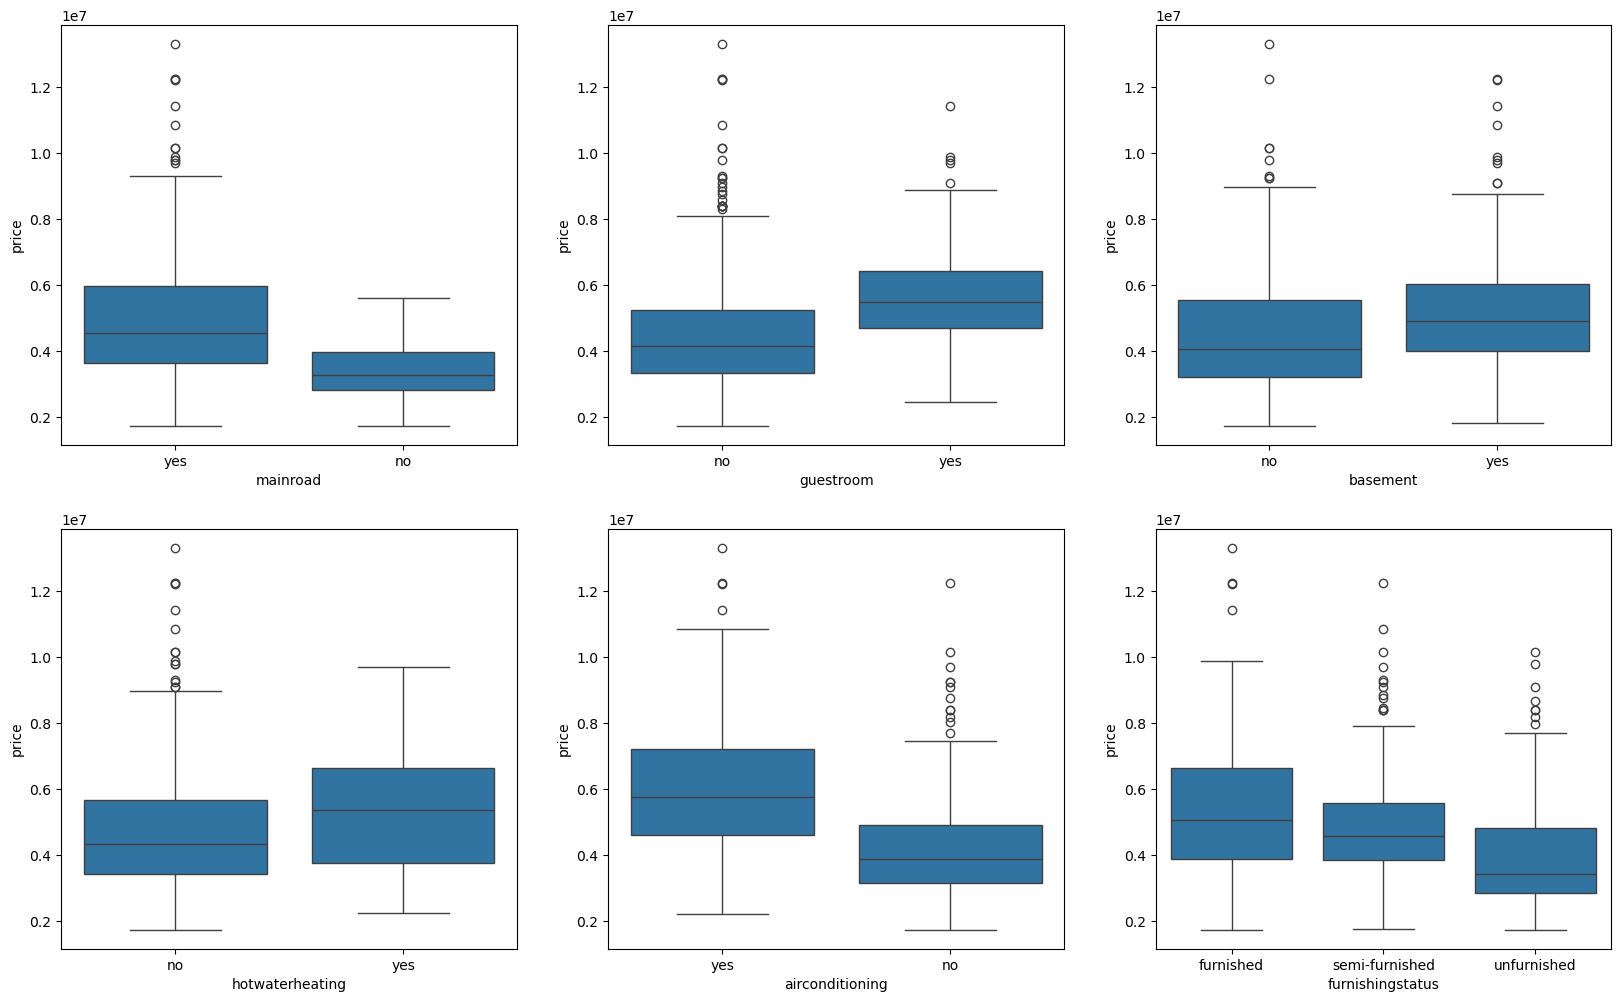

In [26]:
plt.figure(figsize = (20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

In [34]:
sns.set()
# changing the default from plt to sns

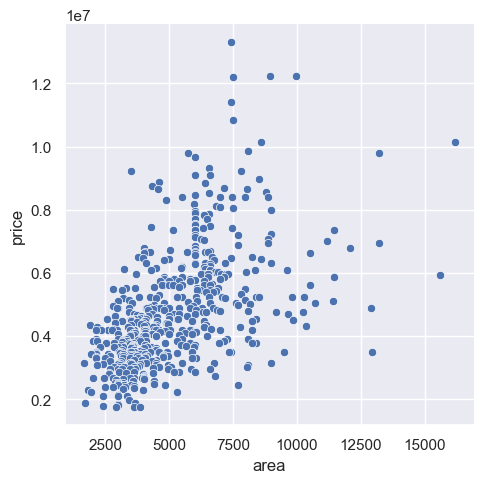

In [30]:
sns.relplot(x = 'area', y = 'price', data = df)
plt.show()

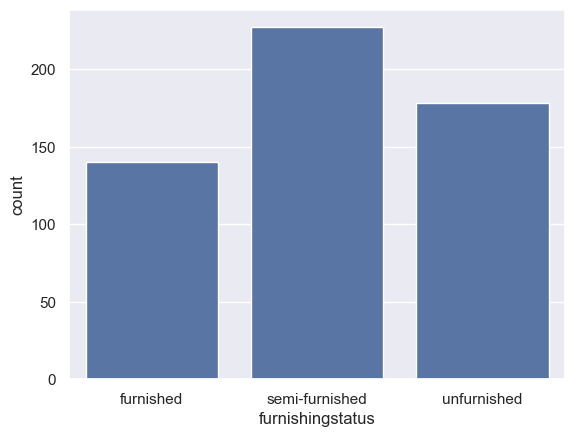

In [32]:
sns.countplot(x = 'furnishingstatus', data = df)
plt.show()

### for binary categories we can use LabelEncoder
#### when we use LabelEncoder for more than 2 categories, ML will think 2 is more imp than 0, 1
### one Hot Encoder is used for more than 2 categories. The same is done with pd.get_dummies. both do the job.

In [54]:
obj_cols = df.select_dtypes(object).columns

In [56]:
obj_cols = obj_cols.to_list()
obj_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [58]:
obj_cols.pop(-1)

'furnishingstatus'

In [60]:
le = LabelEncoder()

for column in obj_cols:
    df[column] = le.fit_transform(df[column])

#### performing one hot encoding

In [63]:
pd.get_dummies(df['furnishingstatus'], dtype = int)

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [69]:
status = pd.get_dummies(df['furnishingstatus'], dtype = int, drop_first = True)

In [67]:
# we dropped the 1st coumn coz 
# ex: is 2nd and 3rd are 0 then 1st will be 1 and so on
# so, to avoid multicollinearity we always delete 1 column
# ex: if we have 10 cols we delete 1 and keep 9

In [71]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [73]:
df = pd.concat([df, status], axis = 1)

In [75]:
df.drop(columns = 'furnishingstatus', inplace = True)

In [77]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [81]:
# now that everything is in numerical form, we can proceed with the ML algorithm

In [83]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000
mean,4766729.2477064,5150.5412844,2.9651376,1.2862385,1.8055046,0.8587156,0.1779817,0.3504587,0.0458716,0.3155963,0.6935780,0.2348624,0.4165138,0.3266055
std,1870439.6156574,2170.1410225,0.7380639,0.5024696,0.8674925,0.3486347,0.3828487,0.4775519,0.2093987,0.4651799,0.8615858,0.4243022,0.4934337,0.4694024
min,1750000.0000000,1650.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,3430000.0000000,3600.0000000,2.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
50%,4340000.0000000,4600.0000000,3.0000000,1.0000000,2.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
75%,5740000.0000000,6360.0000000,3.0000000,2.0000000,2.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,1.0000000,0.0000000,1.0000000,1.0000000
max,13300000.0000000,16200.0000000,6.0000000,4.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,3.0000000,1.0000000,1.0000000,1.0000000


#### Instead of deleting the outliers, we can modify the data in such a way that it does not behave like outliers.
1st way is to remove the outliers
2nd way is to do Data Transformation

##### in data transformation
1. sqrt (converting the whole column in sqrt)
2. log
3. box cox

##### if there's a lot of skewness, then we use log, if the skewness isn't major, we use sqrt

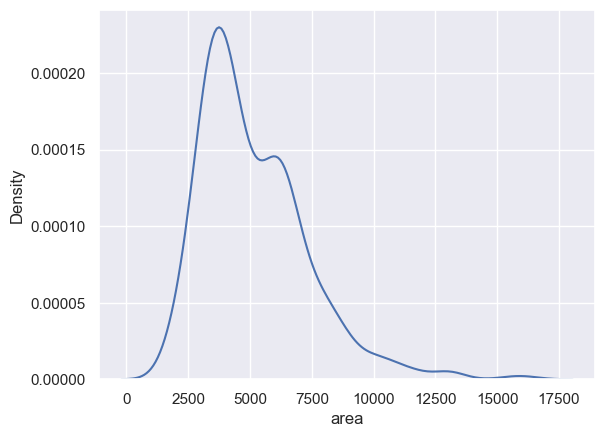

In [87]:
sns.kdeplot(x = 'area', data = df)
plt.show()

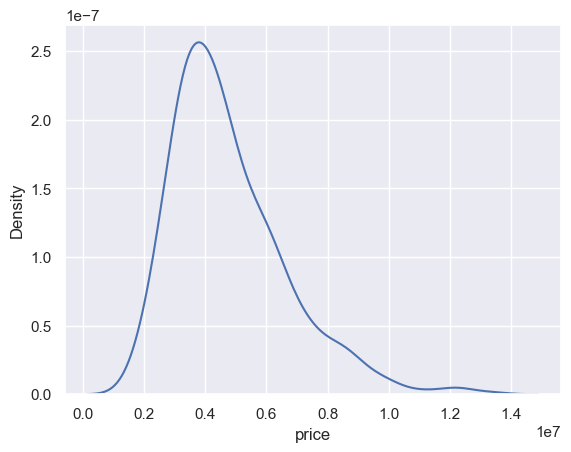

In [92]:
sns.kdeplot(x = 'price', data = df)
plt.show()

In [96]:
df['price'] = np.log(df['price'])
df['area'] = np.log(df['area'])

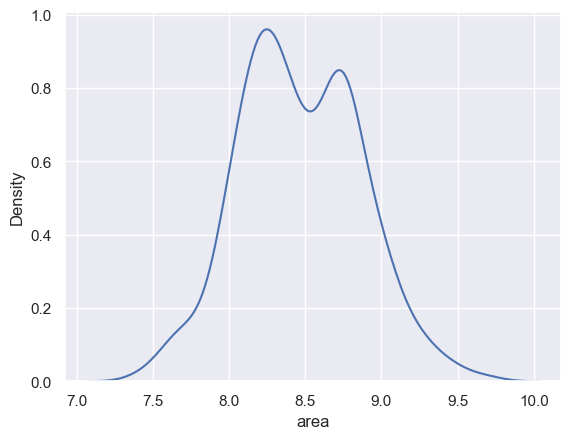

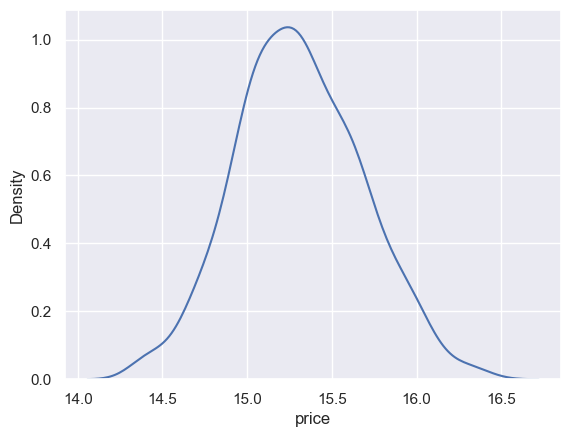

In [98]:
sns.kdeplot(x = 'area', data = df)
plt.show()
sns.kdeplot(x = 'price', data = df)
plt.show()

In [100]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000
mean,15.3069869,8.4665375,2.9651376,1.2862385,1.8055046,0.8587156,0.1779817,0.3504587,0.0458716,0.3155963,0.6935780,0.2348624,0.4165138,0.3266055
std,0.3721652,0.3982834,0.7380639,0.5024696,0.8674925,0.3486347,0.3828487,0.4775519,0.2093987,0.4651799,0.8615858,0.4243022,0.4934337,0.4694024
min,14.3751263,7.4085306,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,15.0480708,8.1886891,2.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
50%,15.2833849,8.4338116,3.0000000,1.0000000,2.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
75%,15.5629698,8.7577837,3.0000000,2.0000000,2.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,1.0000000,0.0000000,1.0000000,1.0000000
max,16.4032746,9.6927665,6.0000000,4.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,3.0000000,1.0000000,1.0000000,1.0000000


### Machine Learning Process

In [104]:
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [106]:
scaler = StandardScaler()

In [108]:
num_cols = ['area', 'price', 'bedrooms', 'bathrooms',  'stories', 'parking']

In [112]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [114]:
# spliting the data to xtrain n ytrain

In [116]:
# we need to standardize the output col n input col so we didnt initially create the X and y train

In [133]:
X_train = df_train.drop(columns = 'price')
y_train = df_train['price']

In [135]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [137]:
lin_reg.coef_

array([ 0.3017325 ,  0.05172491,  0.26013034,  0.19529025,  0.36464589,
        0.18010192,  0.22809761,  0.43976627,  0.42920836,  0.09146178,
        0.33811759, -0.00365457, -0.31753307])

In [139]:
lin_reg.intercept_

-0.5518510086009324

### Testing Process

In [142]:
df_test[num_cols] = scaler.transform(df_test[num_cols]) 

In [144]:
X_test = df_test.drop(columns = 'price')
y_test = df_test['price']

In [146]:
y_pred = lin_reg.predict(X_test)

In [148]:
r2_score(y_test, y_pred)

0.706160265947333

#### In classification data, we do not do the scaling of the output column so we directly split into x train, x test, y train, y test
#### In regression data, we need to scale the output column as well so we 1st scale the data by dividing into 2 parts df_test, df_train and then after scaling, we divide into 4 parts : x train, x test, y train, y test from the df_test and df_train